In [4]:
# Имортирование необходимых библиотек
from libraries import *

df = pd.read_csv("C:\\машинное\данные для обучения\creditcard_for_fitting_models.csv")

# Признаки
X = df.drop("Class", axis=1).values
# Метки классов
y = df["Class"].values

# Кодирование меток
y = LabelEncoder().fit_transform(y)
# Дополнение данных для создания баланса классов
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# Количество меток 1 и 0
print(f"Количество меток класса 0 и 1: {sorted(Counter(y_resampled).values())}")

# Изменение пространства вектор-столбца меток до 2-ух мерного
y_resampled = y_resampled.reshape(-1, 1)

Количество меток класса 0 и 1: [281470, 281470]


In [5]:
def fit(X, y, clf, scaller="None"):
	"""
	Параметры
	_________
	:param X: array
		Вектор признаков
	:param y: array
		Вектор меток класса
	:param clf: Импортированный классификатор
	:param scaller: Способ приведения данных к одному основанию
		MiniMaxScaller/StandardScaller, изначально None

	Возвращает
	__________
	:return: pd.DataFrame
		Датафрейм, содержащий результаты работы алгоритма
	"""

	# Если передан стандартизатор (MiniMax/Standatd Scaller)
	if scaller != "None":
		X = scaller.fit_transform(X)

	# Разбивка на тренировочную и тестовую выборки
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
														random_state=42)

	# Обучение классификатора
	clf.fit(X_train, y_train)
	# Получение предсказанных меток для рассчета качества модели
	y_pred = clf.predict(X_test)

	# Визуализирование результатов работы

	# Установка темы для графика, размеры фигуры и множитель шрифта для осей
	sns.set_theme()
	sns.set(rc={"figure.figsize": (18, 9)}, font_scale=1.3)
	# Матрица ошибок
	ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), fmt=".0f",
					  cmap="YlGnBu", center=0, annot=True,
					  linewidths=0.1, linecolor='gray',
					  annot_kws={"size": 18})

	# Заголовок для матрицы ошибок
	ax1.set_title("Матрица ошибок", fontsize=22)
	print(confusion_matrix(y_test, y_pred))
	# Увеличение размера шрифта для осей
	ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 16)
	ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 16)

	# Кривая roc
	plt.figure()
	fpr, tpr, thresholds = roc_curve(y_test, y_pred)
	ax2 = sns.lineplot(fpr, tpr, color="turquoise", lw=4,
					   label=f"AUC: {round(roc_auc_score(y_test, y_pred), 3)}")
	# Диагональная прямая, показывающая случайное угадывание
	sns.lineplot([0, 1], [0, 1], color="black", lw=2, linestyle="--",
				 label=None, ax=ax2)
	# Легенда для отображения auc оценки
	ax2.legend(loc='lower right', fontsize=16)
	# Заголовок для roc кривой
	ax2.set_title("ROC кривая", fontsize=22)
	# Увеличение размера шрифта для осей
	ax2.tick_params(labelsize=14)
	# Подписание осей
	ax2.set_xlabel("FPR", fontsize=16)
	ax2.set_ylabel("TPR", fontsize=16)

	return pd.DataFrame({
		"precision score": [precision_score(y_test, y_pred)],
		"recall score": [recall_score(y_test, y_pred)],
		"f1 score": [f1_score(y_test, y_pred)],
		"roc auc score": [roc_auc_score(y_test, y_pred)],
	}).T

# Датафрейм для получения оценок
rf_results_df = pd.DataFrame()

[[70416     0]
 [   11 70308]]


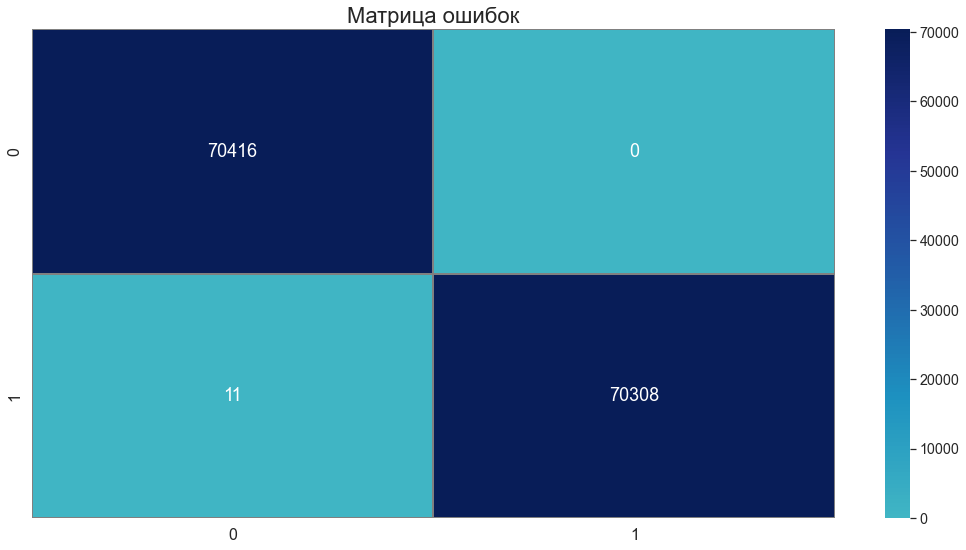

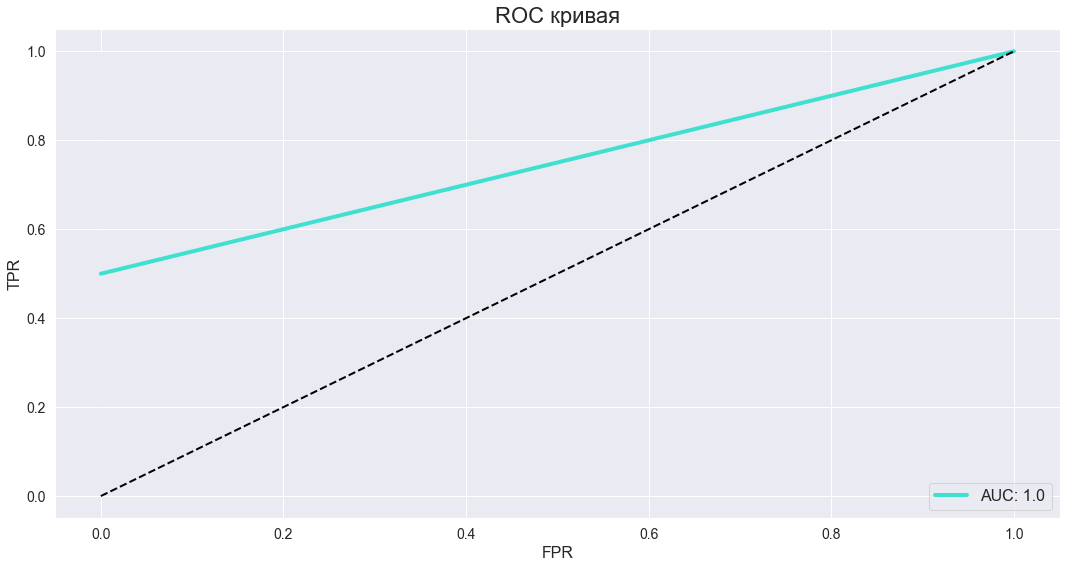

In [6]:
# Обучение случайного леса
rf_results_df["Random Forest"] = fit(X_resampled, y_resampled,
									 RandomForestClassifier(n_jobs=-1,
															random_state=42),
									 StandardScaler())

[[68078  2338]
 [  564 69755]]


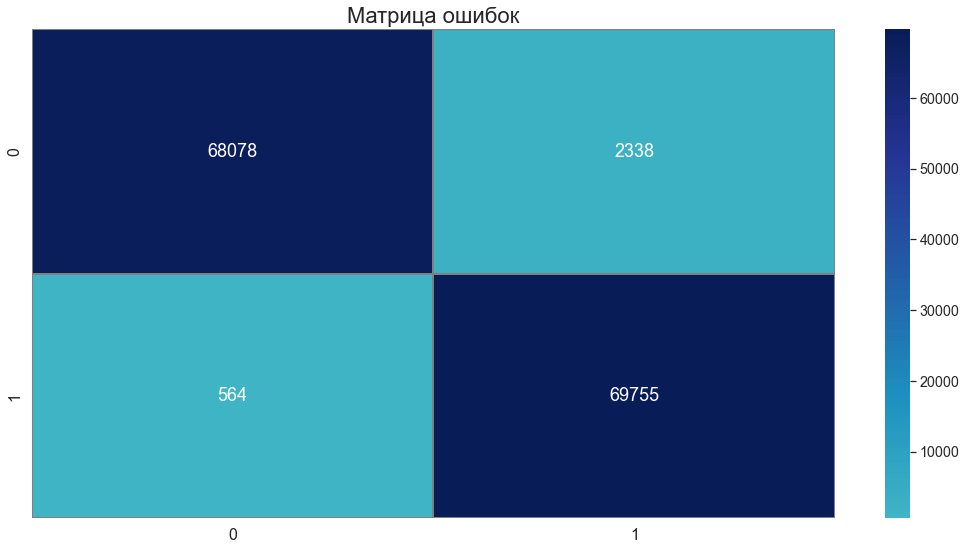

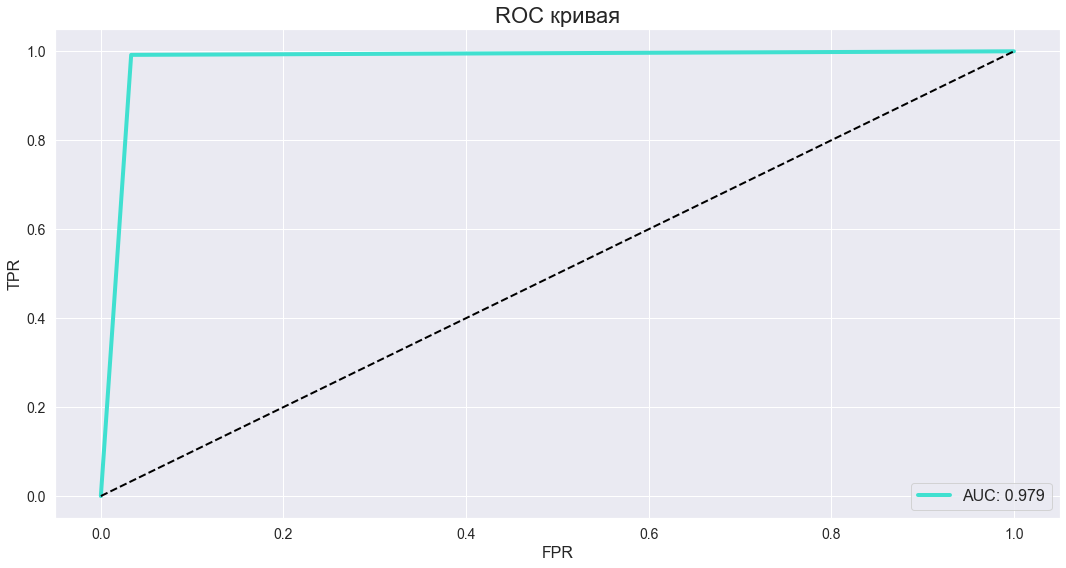

In [8]:
# Обучение логистической регрессии
from sklearn.linear_model import LogisticRegression

rf_results_df["Logistic Regression"] = fit(X_resampled,
										   y_resampled,
										   LogisticRegression(n_jobs=-1,
															  random_state=42),
										   StandardScaler())

[[70045   371]
 [  158 70161]]


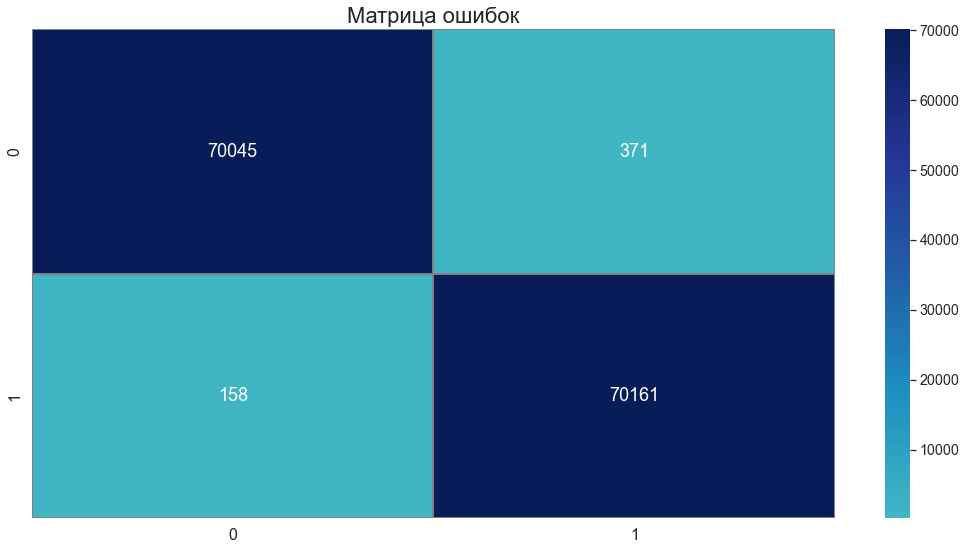

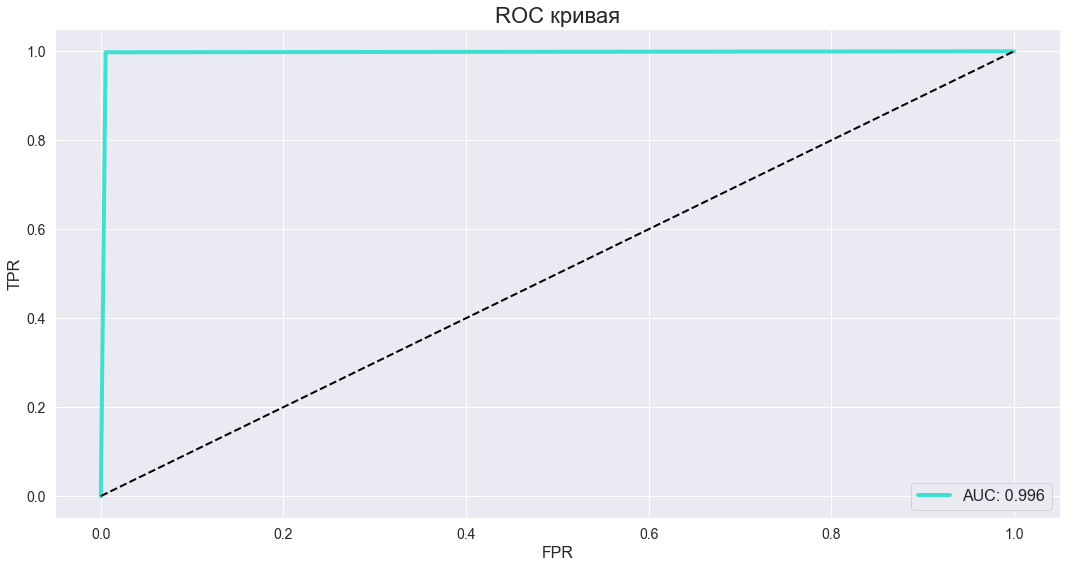

In [10]:
# Обучение метода опорных векторов
rf_results_df["SVC"] = fit(X_resampled, y_resampled, SVC(gamma="auto"),
						   StandardScaler())

In [11]:
rf_results_df

,Random Forest,Logistic Regression,SVC
precision score,1.000000,0.967570,0.994740
recall score,0.999844,0.991979,0.997753
f1 score,0.999922,0.979623,0.996244
roc auc score,0.999922,0.979388,0.996242
